2. **Implement both the Floyd-Steinberg and Jarvis-Judice-Ninke dithering algorithms on the image in either Python or MATLAB, then compare the results obtained from each method**

In [1]:
pip install opencv-python numpy matplotlib


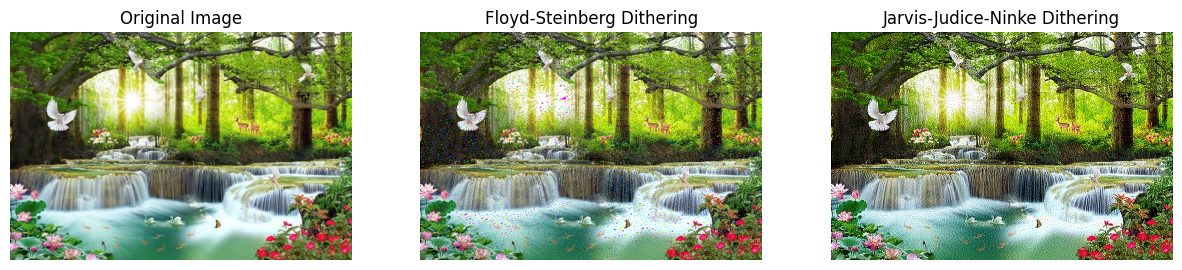

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def floyd_steinberg_dither(image):
    # Convert image to array and get dimensions
    pixels = np.array(image)
    height, width, channels = pixels.shape
    new_pixels = np.zeros_like(pixels)

    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Loop through each channel (R, G, B)
                old_pixel = pixels[y, x, c]
                new_pixel = 255 * (old_pixel // 128)  # Thresholding to get either 0 or 255
                new_pixels[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel

                # Spread error to neighboring pixels
                if x + 1 < width:
                    pixels[y, x + 1, c] += quant_error * 7 / 16
                if x - 1 >= 0 and y + 1 < height:
                    pixels[y + 1, x - 1, c] += quant_error * 3 / 16
                if y + 1 < height:
                    pixels[y + 1, x, c] += quant_error * 5 / 16
                if x + 1 < width and y + 1 < height:
                    pixels[y + 1, x + 1, c] += quant_error * 1 / 16

    return Image.fromarray(new_pixels)

def jarvis_judice_ninke_dither(image):
    # Convert image to array and get dimensions
    pixels = np.array(image)
    height, width, channels = pixels.shape
    new_pixels = np.zeros_like(pixels)

    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Loop through each channel (R, G, B)
                old_pixel = pixels[y, x, c]
                new_pixel = 255 * (old_pixel // 128)  # Thresholding to get either 0 or 255
                new_pixels[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel

                # Spread error to neighboring pixels
                if x + 1 < width:
                    pixels[y, x + 1, c] += quant_error * 7 / 48
                if x + 2 < width:
                    pixels[y, x + 2, c] += quant_error * 5 / 48
                if y + 1 < height:
                    if x - 2 >= 0:
                        pixels[y + 1, x - 2, c] += quant_error * 3 / 48
                    if x - 1 >= 0:
                        pixels[y + 1, x - 1, c] += quant_error * 5 / 48
                    pixels[y + 1, x, c] += quant_error * 7 / 48
                    if x + 1 < width:
                        pixels[y + 1, x + 1, c] += quant_error * 5 / 48
                    if x + 2 < width:
                        pixels[y + 1, x + 2, c] += quant_error * 3 / 48
                if y + 2 < height:
                    if x - 2 >= 0:
                        pixels[y + 2, x - 2, c] += quant_error * 1 / 48
                    if x - 1 >= 0:
                        pixels[y + 2, x - 1, c] += quant_error * 3 / 48
                    if x < width:
                        pixels[y + 2, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixels[y + 2, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixels[y + 2, x + 2, c] += quant_error * 1 / 48

    return Image.fromarray(new_pixels)

def main(image_path):
    # Load the image
    original_image = Image.open(image_path)

    # Apply dithering algorithms
    floyd_image = floyd_steinberg_dither(original_image)
    jarvis_image = jarvis_judice_ninke_dither(original_image)

    # Plot results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Floyd-Steinberg Dithering')
    plt.imshow(floyd_image)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Jarvis-Judice-Ninke Dithering')
    plt.imshow(jarvis_image)
    plt.axis('off')

    plt.show()

# File path
main('/content/Waterfalls.jpg')


# Analysis of Results

**Floyd-Steinberg Dithering:**

Visual Quality: The Floyd-Steinberg method tends to produce a more uniform appearance with smoother gradients, as it effectively spreads the quantization error to adjacent pixels. This results in a reduction of visible banding in areas where the colors transition smoothly.

Artifacts: While it excels in creating smoother transitions, some fine details may become less pronounced, and localized artifacts can appear, particularly in areas with rapid color changes. This might manifest as slight noise or irregularities in texture, but overall, the image remains visually coherent.

**Jarvis-Judice-Ninke Dithering:**

Visual Quality: This method typically excels in preserving detail, especially in complex images with intricate patterns or textures. The wider error diffusion allows for a more detailed and nuanced representation of the image.

Artifacts: However, this can also lead to more noticeable artifacts or noise, particularly in regions with subtle gradients. The increased detail retention may sometimes come at the cost of introducing patterns that can be visually distracting.

**Conclusion**

Overall, the comparison indicates that while both dithering methods effectively handle color quantization, they each have their unique strengths. The Floyd-Steinberg dithering is advantageous for producing smoother gradients and less noticeable banding, making it suitable for images where color transitions are crucial. In contrast, the Jarvis-Judice-Ninke dithering method offers superior detail retention, making it more effective for complex images but potentially introducing more visible artifacts.